In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns # theme & dataset
print(f"Matplotlib Version : {mpl.__version__}")
print(f"Seaborn Version : {sns.__version__}")

# for visualization samples
import pandas as pd

# settings for plot size
plt.rcParams["figure.dpi"] = 140

print(sk.__version__)

Matplotlib Version : 3.3.4
Seaborn Version : 0.11.1
0.24.1


In [39]:
# preprocesssing the data
data = pd.read_csv('./StudentsPerformance.csv')

LE = preprocessing.LabelEncoder()

data.columns = "gender","race","parental_edu","lunch","test_prep","math","reading","writing"
data = data.apply(LE.fit_transform)

data

,gender,race,parental_edu,lunch,test_prep,math,reading,writing
0,0,1,1,1,1,52,44,50
1,0,2,4,1,0,49,62,64
2,0,1,3,1,1,70,67,69
3,1,0,0,0,1,27,29,20
4,1,2,4,1,1,56,50,51
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,68,70,71
996,1,2,2,0,1,42,27,31
997,0,2,2,0,0,39,43,41
998,0,3,4,1,0,48,50,53


<AxesSubplot:>

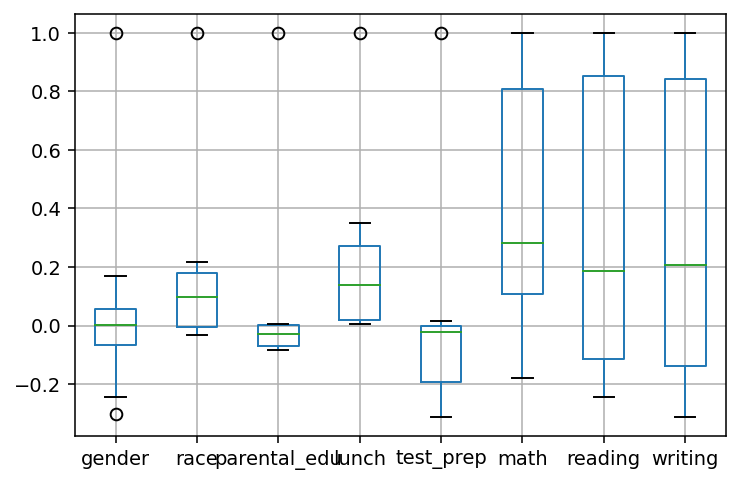

In [3]:
corr = data.corr()
corr.boxplot()

In [4]:
data.isna().sum()
# No missing data in this dataset

gender          0
race            0
parental_edu    0
lunch           0
test_prep       0
math            0
reading         0
writing         0
dtype: int64

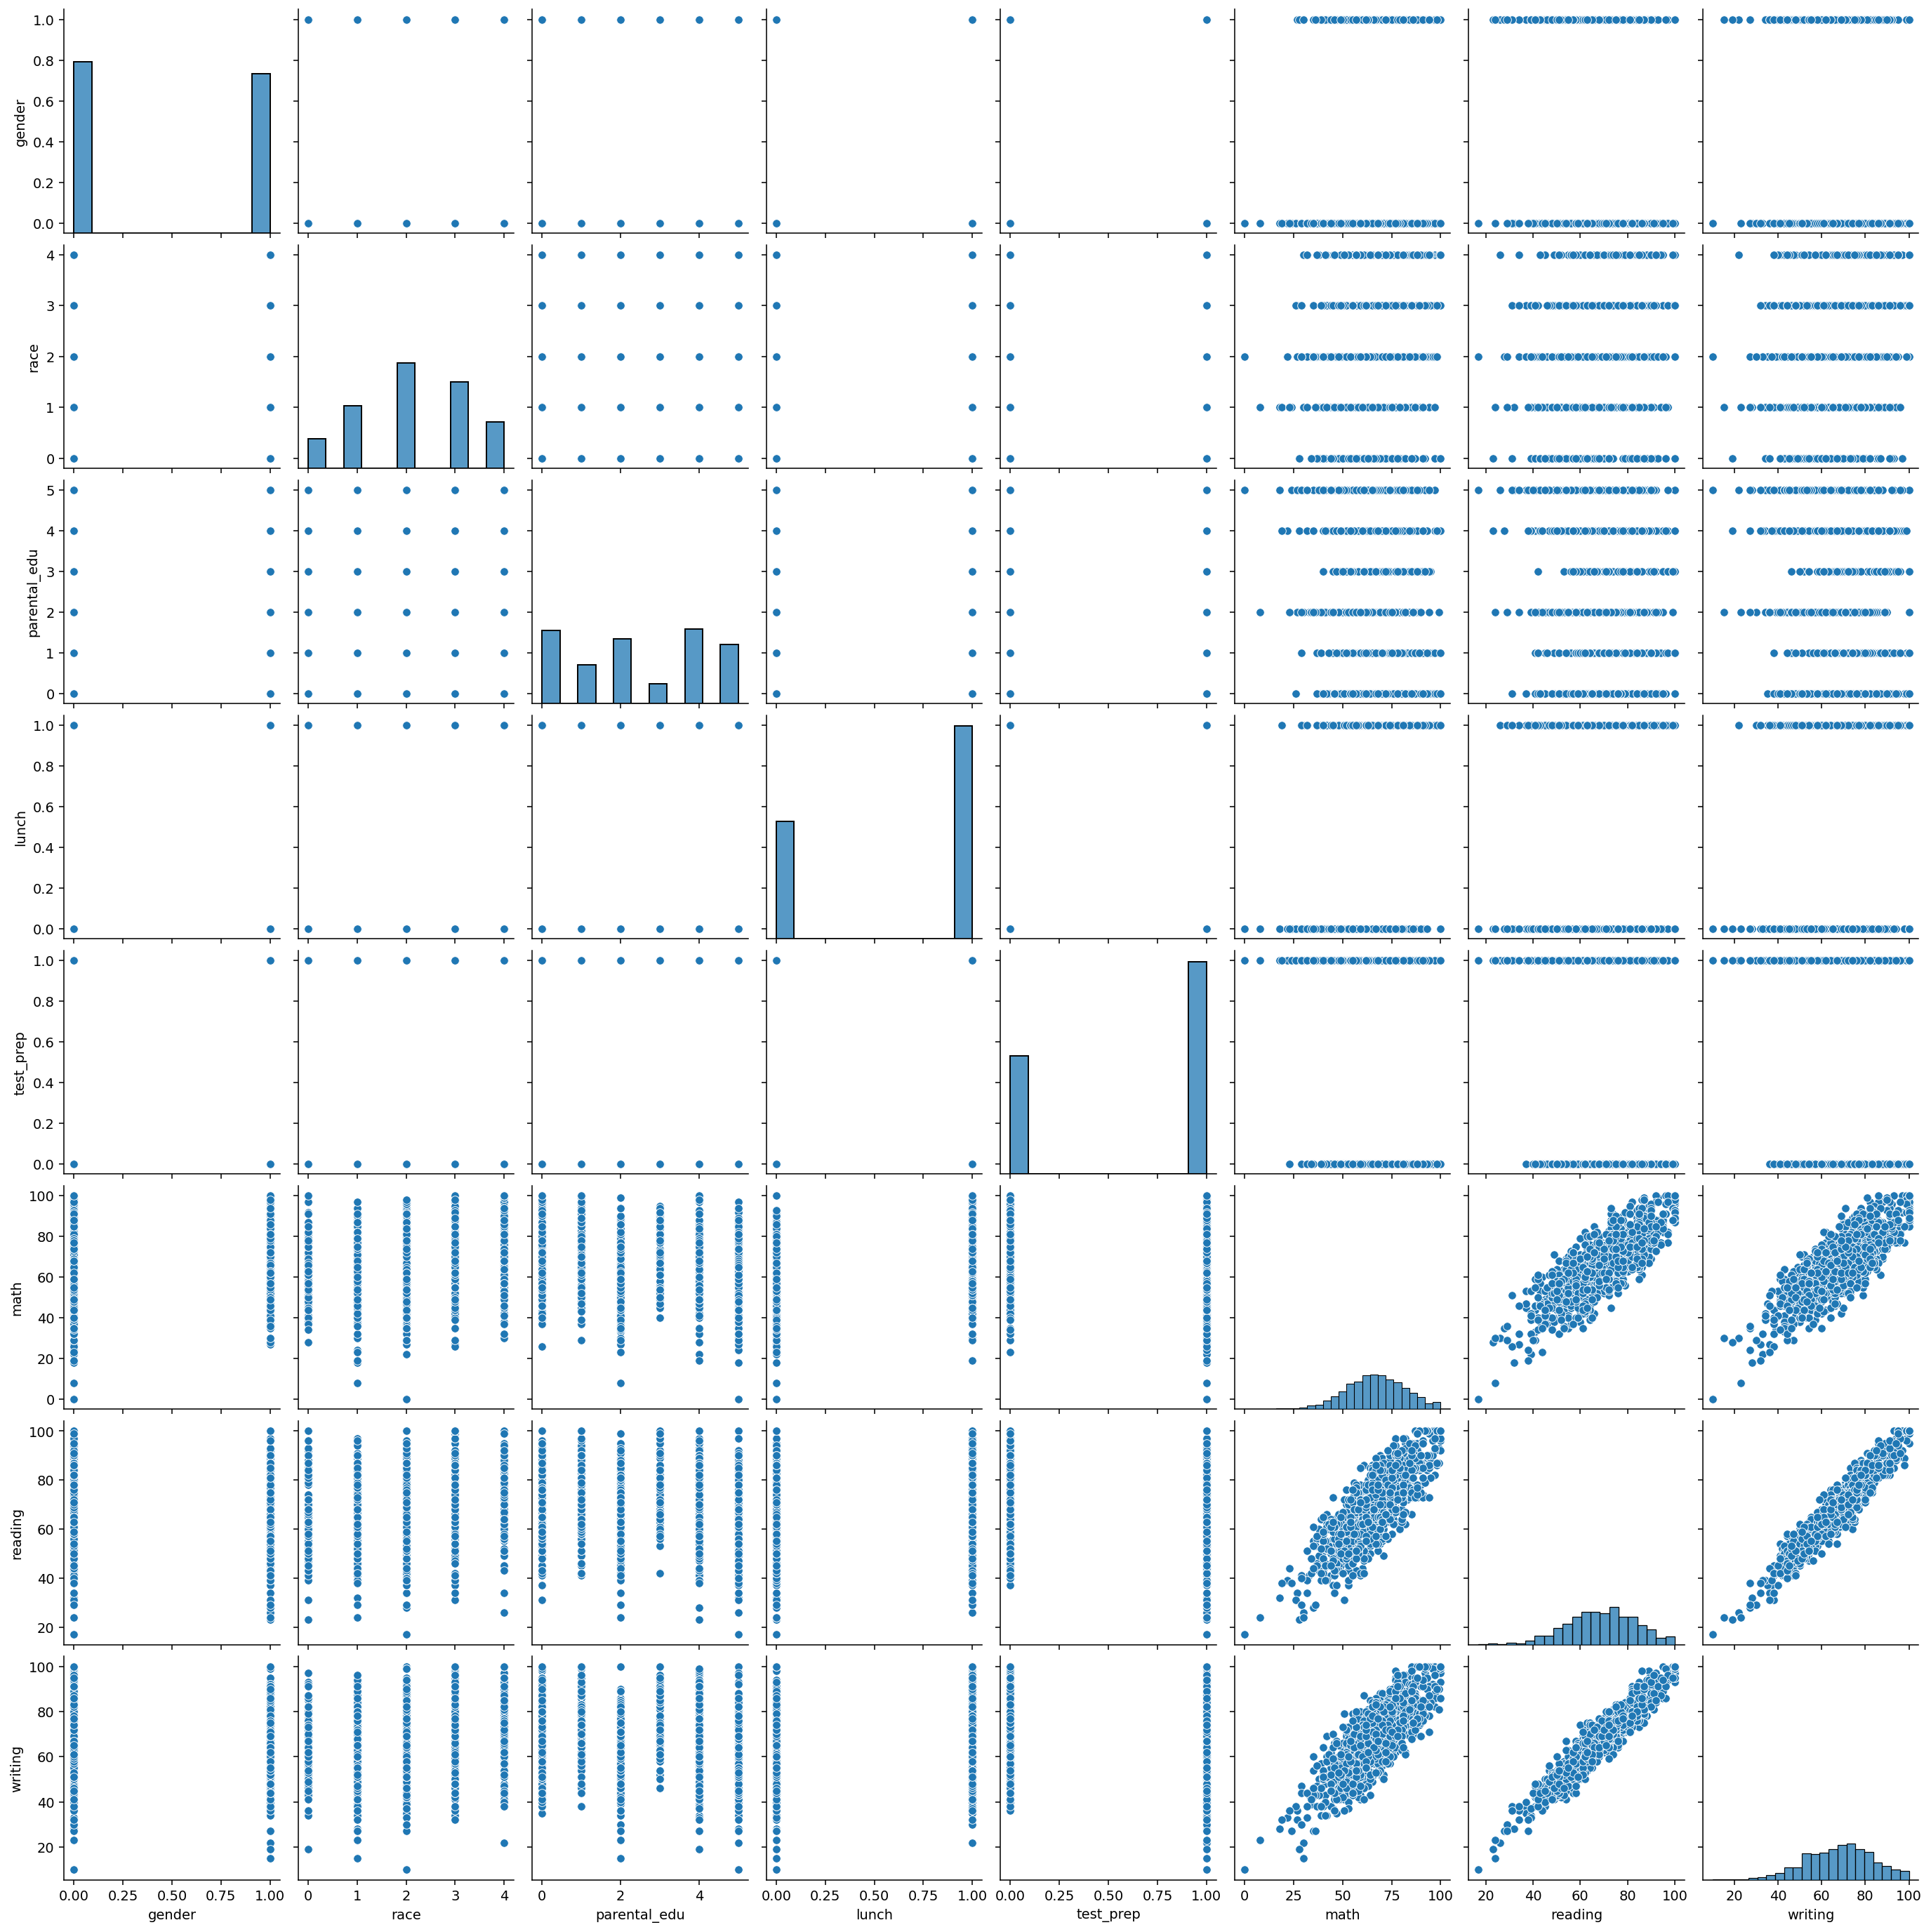

In [5]:
sns.pairplot(data.iloc[:,:])

In [7]:
train_set = data[["math", "reading", "writing"]]
target_set = data["gender"]

In [8]:
# Répartition Gender avant le train_test_split
target_set.value_counts(normalize=True) * 100

0    51.8
1    48.2
Name: gender, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(train_set, target_set, 
    test_size=0.33, random_state=42, stratify=target_set)

In [10]:
x_train.head()

,math,reading,writing
414,51,72,79
309,49,57,52
933,70,75,74
427,69,71,65
121,91,89,92


In [11]:
x_test.head()

,math,reading,writing
917,44,61,52
223,86,80,75
421,57,58,64
941,78,91,96
438,70,56,51


In [12]:
y_train.head()

414    0
309    0
933    1
427    1
121    1
Name: gender, dtype: int64

In [13]:
y_test.head()

917    0
223    1
421    0
941    0
438    1
Name: gender, dtype: int64

In [14]:
knn = KNeighborsClassifier(n_neighbors=25, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=25)

In [15]:
predictions = knn.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [16]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

array([[151,  20],
       [ 26, 133]])

In [17]:
acc = conf_mat.diagonal().sum()/conf_mat.sum()

err = 1 - acc
print("taux d'erreur ", err)

taux d'erreur  0.1393939393939394


In [18]:
accuracy_score = accuracy_score(y_test, predictions)
accuracy_score

0.8606060606060606

In [19]:
err_default = err
neighbors = range(2, 101)
errors = []
for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k) 	# n_jobs=-1
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')


Results : knn = 2 => err_test = 18.485

Improvement of -18.34560606060606%



Results : knn = 3 => err_test = 14.848

Improvement of -14.708606060606062%



Results : knn = 4 => err_test = 16.97

Improvement of -16.83060606060606%



Results : knn = 5 => err_test = 15.455

Improvement of -15.315606060606061%



Results : knn = 6 => err_test = 16.667

Improvement of -16.52760606060606%



Results : knn = 7 => err_test = 14.545

Improvement of -14.405606060606061%



Results : knn = 8 => err_test = 16.364

Improvement of -16.22460606060606%



Results : knn = 9 => err_test = 13.939

Improvement of -13.799606060606061%



Results : knn = 10 => err_test = 14.545

Improvement of -14.405606060606061%



Results : knn = 11 => err_test = 13.939

Improvement of -13.799606060606061%



Results : knn = 12 => err_test = 13.939

Improvement of -13.799606060606061%



Results : knn = 13 => err_test = 14.848

Improvement of -14.708606060606062%



Results : knn = 14 => err_test = 15.455

Improvement

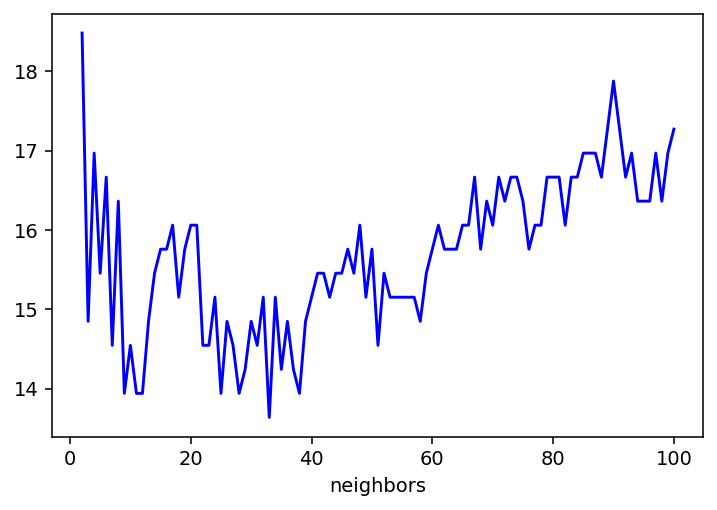

In [20]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')
plt.show()